In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv("numeric_data.csv", sep=";")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 1485 non-null   int64  
 1   Cena                                       1485 non-null   float64
 2   Powierzchnia                               1485 non-null   float64
 3   Liczba pokoi                               1485 non-null   int64  
 4   Całkowita liczba pięter                    1485 non-null   int64  
 5   Rok budowy                                 1485 non-null   float64
 6   Długość tytułu                             1485 non-null   int64  
 7   Forma własności_pełna własność             1485 non-null   int64  
 8   Forma własności_spółdzielcze wł. z KW      1485 non-null   int64  
 9   Forma własności_spółdzielcze własnościowe  1485 non-null   int64  
 10  Forma własności_zapytaj 

In [129]:
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cena                                       1485 non-null   float64
 1   Powierzchnia                               1485 non-null   float64
 2   Liczba pokoi                               1485 non-null   int64  
 3   Całkowita liczba pięter                    1485 non-null   int64  
 4   Rok budowy                                 1485 non-null   float64
 5   Długość tytułu                             1485 non-null   int64  
 6   Forma własności_pełna własność             1485 non-null   int64  
 7   Forma własności_spółdzielcze wł. z KW      1485 non-null   int64  
 8   Forma własności_spółdzielcze własnościowe  1485 non-null   int64  
 9   Forma własności_zapytaj                    1485 non-null   int64  
 10  Stan wykończenia_do remo

In [131]:
# Usuwamy wartości odstające 
df["Cena"].max()

5199000.0

In [132]:
df["Cena"].min()

120000.0

In [133]:
df["Cena"].describe()

count    1.485000e+03
mean     6.169760e+05
std      2.940658e+05
min      1.200000e+05
25%      4.394400e+05
50%      5.750000e+05
75%      7.135500e+05
max      5.199000e+06
Name: Cena, dtype: float64

In [134]:
import matplotlib.pyplot as plt

In [135]:
%matplotlib inline
#%matplotlib qt

Text(0, 0.5, 'Number of flats')

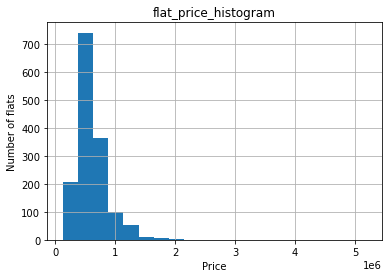

In [136]:
# tworzymy histogram
df["Cena"].hist(bins=20)
plt.title("flat_price_histogram")
plt.xlabel("Price")
plt.ylabel("Number of flats")

<AxesSubplot:>

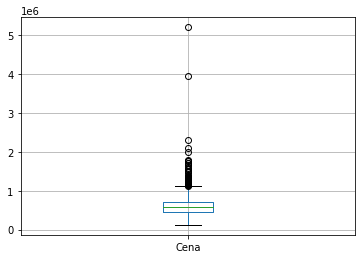

In [137]:
#df.boxplot(column=["Cena"])
df.boxplot(column="Cena")
# wyjątek - działa bez nawiasu (tj. column, a nie columns)

In [138]:
# Metoda (trzech) sigma
# trzy odchylenia standardowe - odrzucamy wszystkie wartości oddalone o x sigma (np.3 sigma) od średniej
def remove_values(df, col_name="Cena", sigma=1.5):
    mean = df[col_name].mean()
    std = df[col_name].std()
    up = mean + sigma*std
    down = mean - sigma*std
    df = df[(df[col_name] > down) & (df[col_name] < up)]
    return df
    

In [139]:
test = remove_values(df)

Text(0, 0.5, 'Number of flats')

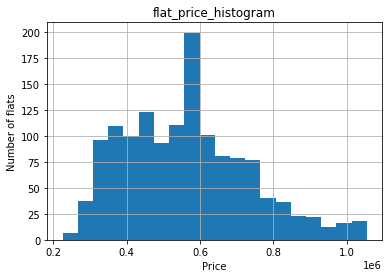

In [140]:
test["Cena"].hist(bins=20)
plt.title("flat_price_histogram")
plt.xlabel("Price")
plt.ylabel("Number of flats")

In [141]:
test.describe()

,Cena,Powierzchnia,Liczba pokoi,Całkowita liczba pięter,Rok budowy,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,...,Ogrzewanie_gazowe,Ogrzewanie_kotłownia,Ogrzewanie_miejskie,Rynek_pierwotny,Rynek_wtórny,Typ ogłoszeniodawcy_biuro nieruchomości,Typ ogłoszeniodawcy_deweloper,Typ ogłoszeniodawcy_prywatny,Winda_nie,Winda_tak
count,1.379000e+03,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,5.628163e+05,46.538080,2.090645,3.851342,2015.087153,40.729514,0.652647,0.003626,0.013778,0.329949,...,0.311095,0.102248,0.586657,0.704133,0.295867,0.457578,0.496737,0.045685,0.229152,0.770848
std,1.707304e+05,17.365163,0.811595,1.808006,17.975280,7.319978,0.476302,0.060127,0.116611,0.470365,...,0.463110,0.303084,0.492612,0.456597,0.456597,0.498378,0.500171,0.208877,0.420439,0.420439
min,2.250000e+05,16.150000,1.000000,0.000000,1900.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300695e+05,35.640000,2.000000,3.000000,2018.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.600000e+05,42.560000,2.000000,4.000000,2021.000000,42.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.686610e+05,52.810000,2.000000,4.000000,2023.000000,47.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.055164e+06,244.200000,10.000000,14.000000,2024.000000,50.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
test = test[test["Cena"] > 180000]

Text(0, 0.5, 'Number of flats')

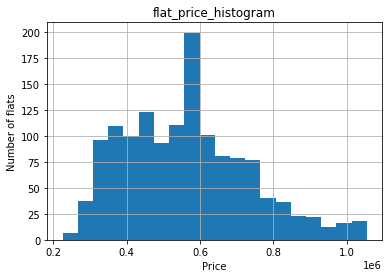

In [143]:
test["Cena"].hist(bins=20)
plt.title("flat_price_histogram")
plt.xlabel("Price")
plt.ylabel("Number of flats")

In [144]:
test = test.reset_index(drop=True) #zeruje indeksy, numeruje od nowa

<AxesSubplot:>

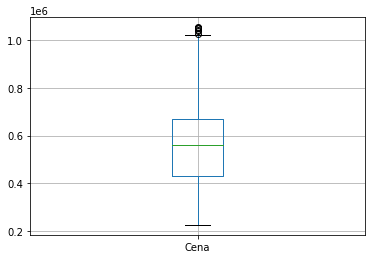

In [145]:
# BoxPlot - wykres pudełkowy

test.boxplot(column="Cena")

In [146]:
test.describe()

,Cena,Powierzchnia,Liczba pokoi,Całkowita liczba pięter,Rok budowy,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,...,Ogrzewanie_gazowe,Ogrzewanie_kotłownia,Ogrzewanie_miejskie,Rynek_pierwotny,Rynek_wtórny,Typ ogłoszeniodawcy_biuro nieruchomości,Typ ogłoszeniodawcy_deweloper,Typ ogłoszeniodawcy_prywatny,Winda_nie,Winda_tak
count,1.379000e+03,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,5.628163e+05,46.538080,2.090645,3.851342,2015.087153,40.729514,0.652647,0.003626,0.013778,0.329949,...,0.311095,0.102248,0.586657,0.704133,0.295867,0.457578,0.496737,0.045685,0.229152,0.770848
std,1.707304e+05,17.365163,0.811595,1.808006,17.975280,7.319978,0.476302,0.060127,0.116611,0.470365,...,0.463110,0.303084,0.492612,0.456597,0.456597,0.498378,0.500171,0.208877,0.420439,0.420439
min,2.250000e+05,16.150000,1.000000,0.000000,1900.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300695e+05,35.640000,2.000000,3.000000,2018.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.600000e+05,42.560000,2.000000,4.000000,2021.000000,42.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.686610e+05,52.810000,2.000000,4.000000,2023.000000,47.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.055164e+06,244.200000,10.000000,14.000000,2024.000000,50.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

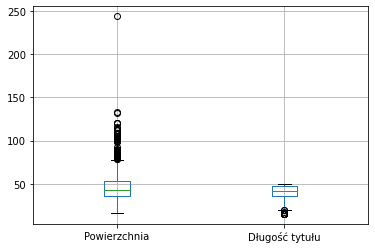

In [147]:
test.boxplot(column=["Powierzchnia","Długość tytułu"])

In [148]:
cor_matrix = test.drop(columns=["Cena"]).corr()

In [149]:
cor_matrix

,Powierzchnia,Liczba pokoi,Całkowita liczba pięter,Rok budowy,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,...,Ogrzewanie_gazowe,Ogrzewanie_kotłownia,Ogrzewanie_miejskie,Rynek_pierwotny,Rynek_wtórny,Typ ogłoszeniodawcy_biuro nieruchomości,Typ ogłoszeniodawcy_deweloper,Typ ogłoszeniodawcy_prywatny,Winda_nie,Winda_tak
Powierzchnia,1.000000,0.772461,-0.093138,-0.365864,0.042551,0.076695,-0.016604,0.179929,-0.120147,0.132915,...,0.031364,-0.032694,-0.009370,-0.296035,0.296035,0.167842,-0.160770,-0.015493,0.380354,-0.380354
Liczba pokoi,0.772461,1.000000,-0.172311,-0.298964,0.039066,-0.049900,-0.006740,0.117147,0.022349,0.141425,...,-0.053843,-0.020005,0.062927,-0.254611,0.254611,0.132411,-0.137817,0.014081,0.345284,-0.345284
Całkowita liczba pięter,-0.093138,-0.172311,1.000000,0.022775,-0.088360,0.310778,-0.001714,0.061352,-0.329692,0.009189,...,-0.146667,-0.070240,0.181099,-0.074415,0.074415,0.032056,-0.074766,0.102546,-0.123174,0.123174
Rok budowy,-0.365864,-0.298964,0.022775,1.000000,0.058715,-0.155950,-0.079528,-0.209352,0.219986,-0.264977,...,0.004305,0.042972,-0.030486,0.567659,-0.567659,-0.357052,0.388426,-0.078190,-0.514206,0.514206
Długość tytułu,0.042551,0.039066,-0.088360,0.058715,1.000000,-0.019058,-0.063722,-0.055992,0.041326,-0.044369,...,0.085208,0.063502,-0.119176,0.077870,-0.077870,-0.001656,-0.005890,0.018055,-0.112128,0.112128
Forma własności_pełna własność,0.076695,-0.049900,0.310778,-0.155950,-0.019058,1.000000,-0.082689,-0.162017,-0.961885,-0.001311,...,0.049396,-0.055413,-0.012345,-0.239319,0.239319,0.290974,-0.335268,0.108561,-0.011728,0.011728
Forma własności_spółdzielcze wł. z KW,-0.016604,-0.006740,-0.001714,-0.079528,-0.063722,-0.082689,1.000000,-0.007130,-0.042331,0.102599,...,0.011585,-0.020358,0.001635,-0.093062,0.093062,0.041462,-0.059932,0.044583,0.081934,-0.081934
Forma własności_spółdzielcze własnościowe,0.179929,0.117147,0.061352,-0.209352,-0.055992,-0.162017,-0.007130,1.000000,-0.082942,0.212304,...,-0.065990,0.001176,0.061314,-0.182342,0.182342,0.116203,-0.117428,0.003932,0.187182,-0.187182
Forma własności_zapytaj,-0.120147,0.022349,-0.329692,0.219986,0.041326,-0.961885,-0.042331,-0.082942,1.000000,-0.064421,...,-0.035141,0.058423,-0.002909,0.299441,-0.299441,-0.328756,0.376273,-0.116605,-0.045003,0.045003
Stan wykończenia_do remontu,0.132915,0.141425,0.009189,-0.264977,-0.044369,-0.001311,0.102599,0.212304,-0.064421,1.000000,...,-0.032489,-0.016013,0.040395,-0.172352,0.172352,0.121639,-0.110994,-0.024444,0.173635,-0.173635


In [150]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [151]:
import seaborn as sns

In [152]:
import matplotlib.pyplot as plt

<AxesSubplot:>

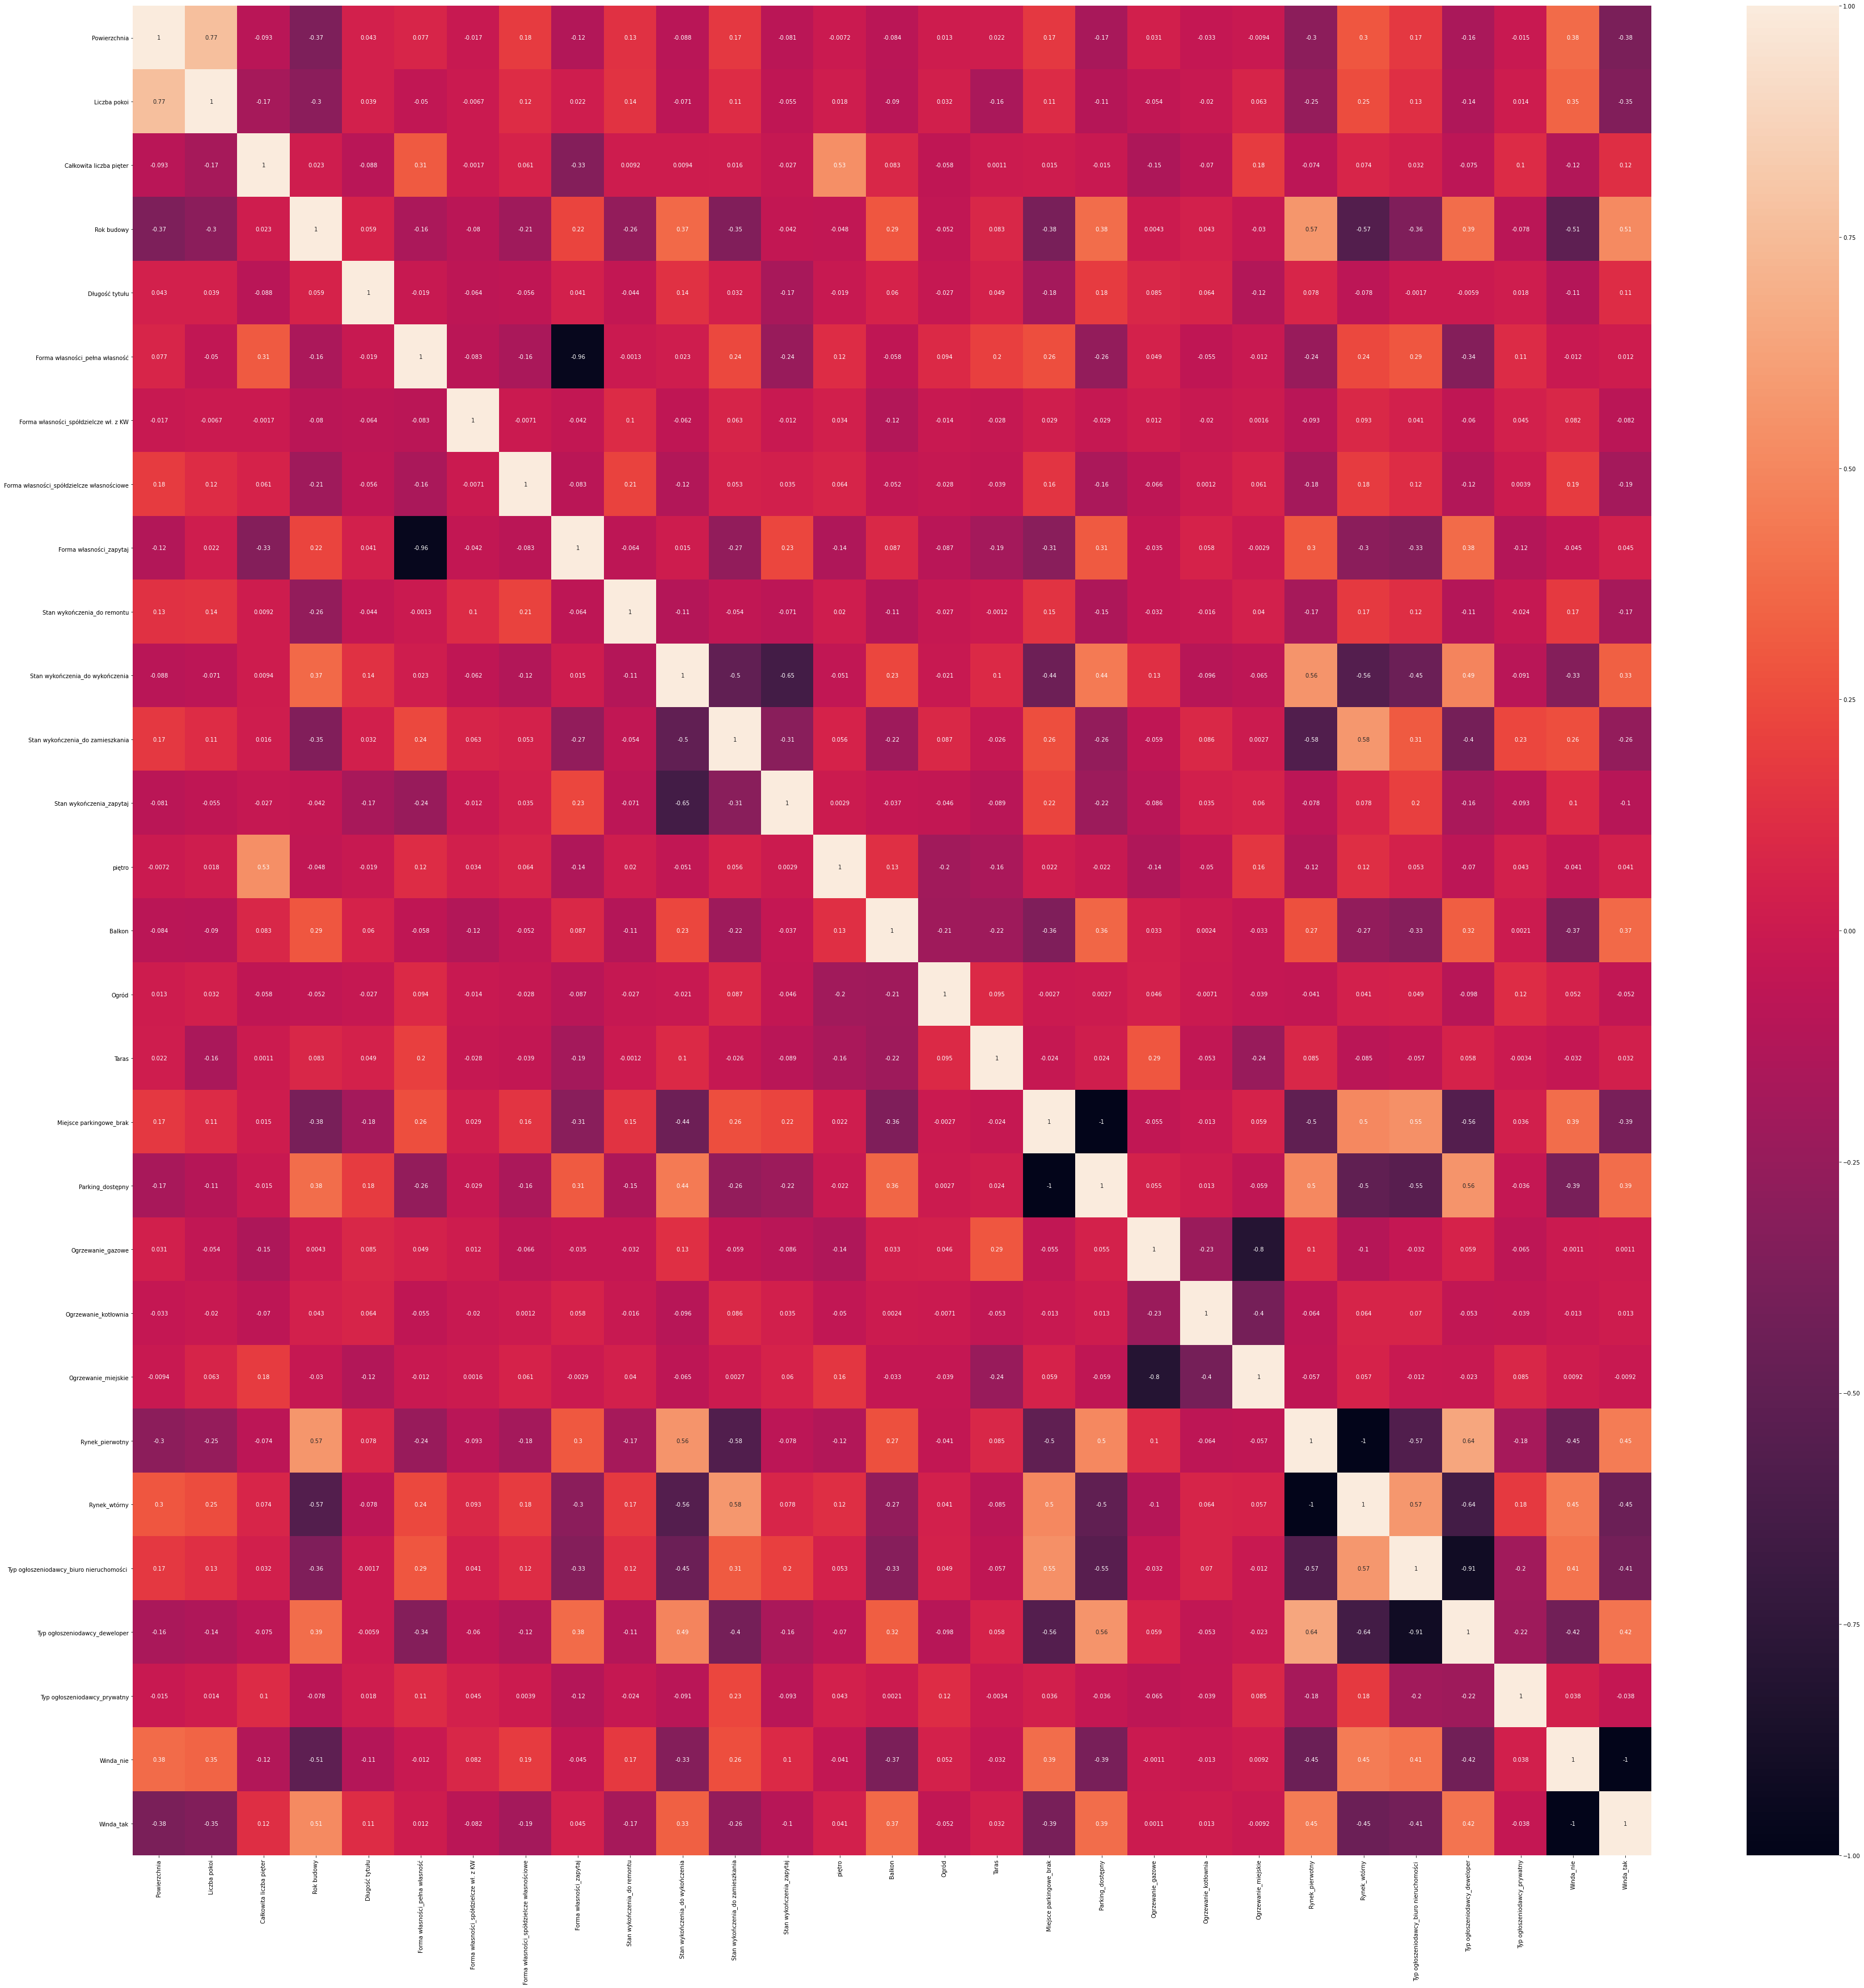

In [153]:
#%matplotlib qt
%matplotlib inline
plt.figure(figsize=(60, 60))
sns.heatmap(cor_matrix, annot=True)

In [154]:
triu_matrix = np.triu(cor_matrix, k=1)

In [155]:
df_triu = pd.DataFrame(triu_matrix)

<AxesSubplot:>

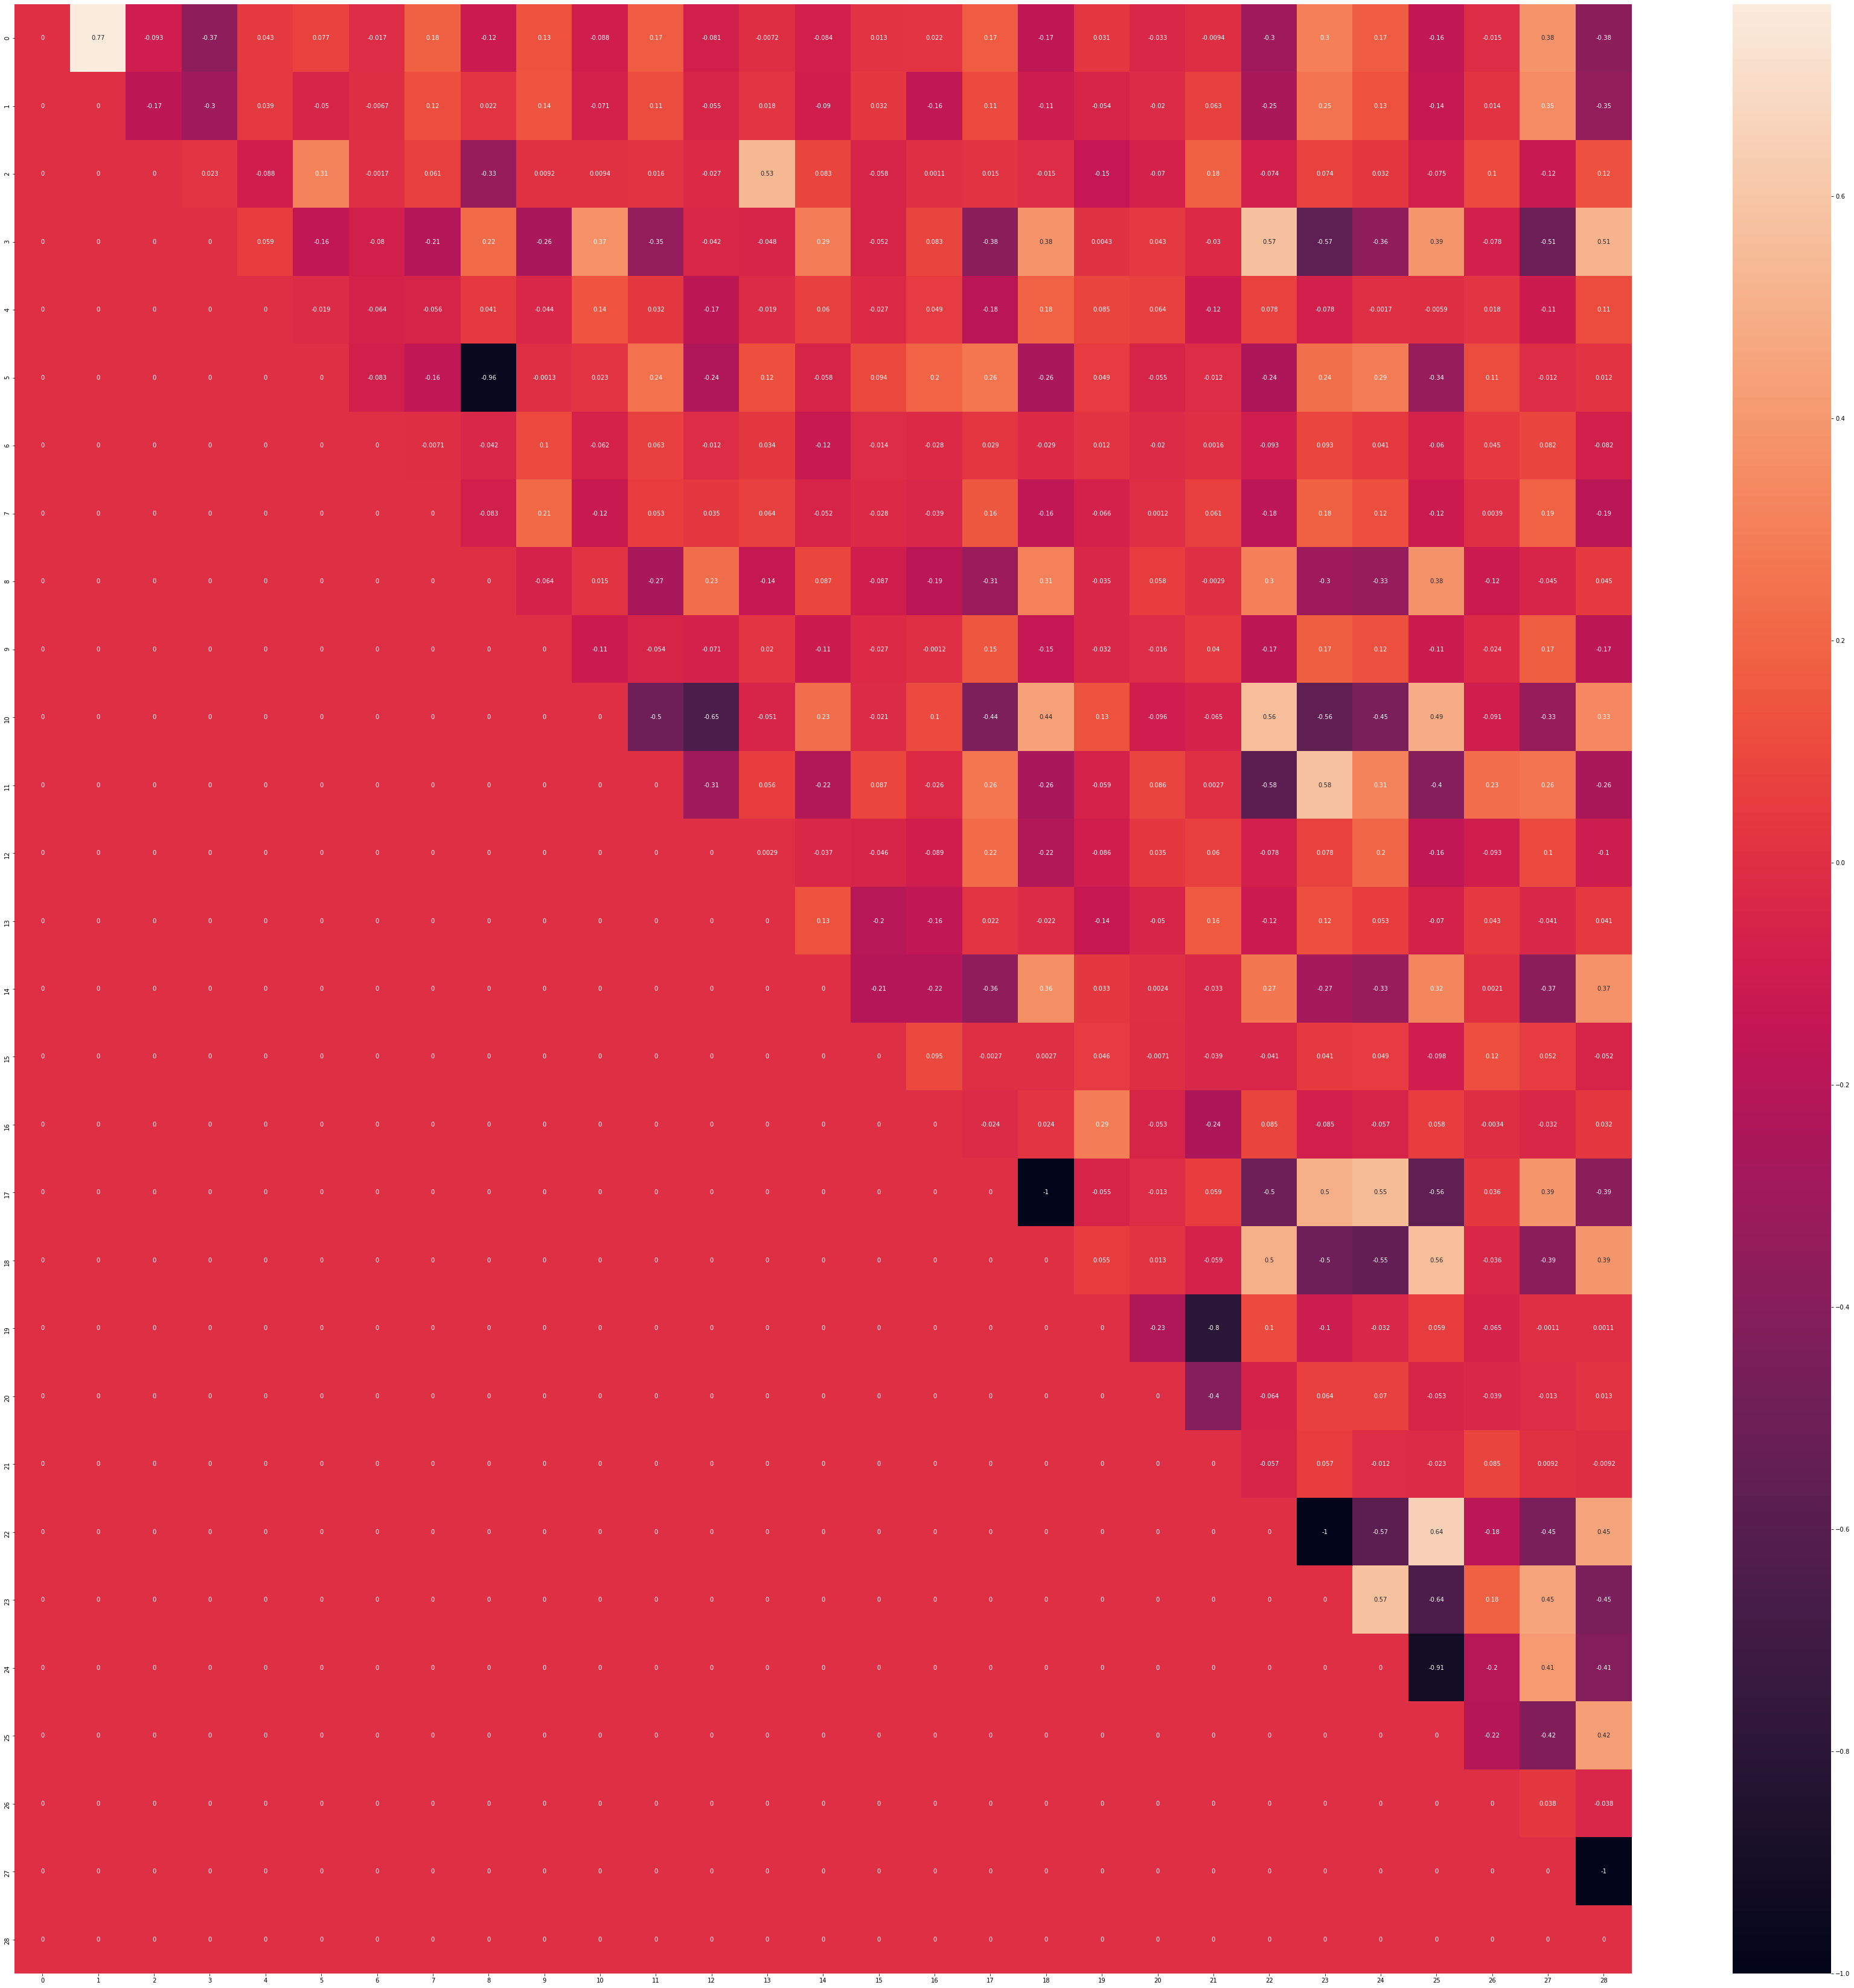

In [156]:
plt.figure(figsize=(60, 60))
sns.heatmap(df_triu, annot=True)

In [157]:
columns = test.drop(columns = ["Cena"]).columns


In [158]:
columns

Index(['Powierzchnia', 'Liczba pokoi', 'Całkowita liczba pięter', 'Rok budowy',
       'Długość tytułu', 'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras', 'Miejsce parkingowe_brak',
       'Parking_dostępny', 'Ogrzewanie_gazowe', 'Ogrzewanie_kotłownia',
       'Ogrzewanie_miejskie', 'Rynek_pierwotny', 'Rynek_wtórny',
       'Typ ogłoszeniodawcy_biuro nieruchomości ',
       'Typ ogłoszeniodawcy_deweloper', 'Typ ogłoszeniodawcy_prywatny',
       'Winda_nie', 'Winda_tak'],
      dtype='object')

In [159]:
threshold = 0.54
high_correlated_features = [columns[col] for col in df_triu.columns if any(df_triu[col] > threshold)]

In [160]:
high_correlated_features

['Liczba pokoi',
 'Rynek_pierwotny',
 'Rynek_wtórny',
 'Typ ogłoszeniodawcy_biuro nieruchomości ',
 'Typ ogłoszeniodawcy_deweloper']

In [161]:
df = test.drop(columns = high_correlated_features)

In [162]:
df

,Cena,Powierzchnia,Całkowita liczba pięter,Rok budowy,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,...,Ogród,Taras,Miejsce parkingowe_brak,Parking_dostępny,Ogrzewanie_gazowe,Ogrzewanie_kotłownia,Ogrzewanie_miejskie,Typ ogłoszeniodawcy_prywatny,Winda_nie,Winda_tak
0,457800.0,42.00,4,2020.0,24,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,664900.0,61.00,4,2020.0,24,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,672530.0,61.70,4,2020.0,24,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,505760.0,46.40,4,2020.0,24,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,416380.0,38.20,4,2020.0,24,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,814752.0,29.44,14,2021.0,34,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1375,999000.0,102.91,5,1999.0,45,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1376,339000.0,45.23,4,1980.0,38,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1377,750000.0,98.90,3,2004.0,42,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


In [163]:
df["Powierzchnia"].corr(df["Cena"])

0.41935926757441805

In [164]:
# Train test split 
x = df.drop(columns = ["Cena"])
y = df["Cena"]

In [165]:
x

,Powierzchnia,Całkowita liczba pięter,Rok budowy,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,Stan wykończenia_do wykończenia,...,Ogród,Taras,Miejsce parkingowe_brak,Parking_dostępny,Ogrzewanie_gazowe,Ogrzewanie_kotłownia,Ogrzewanie_miejskie,Typ ogłoszeniodawcy_prywatny,Winda_nie,Winda_tak
0,42.00,4,2020.0,24,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,61.00,4,2020.0,24,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,61.70,4,2020.0,24,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,46.40,4,2020.0,24,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,38.20,4,2020.0,24,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,29.44,14,2021.0,34,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1375,102.91,5,1999.0,45,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1376,45.23,4,1980.0,38,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1377,98.90,3,2004.0,42,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


In [166]:
y

0       457800.0
1       664900.0
2       672530.0
3       505760.0
4       416380.0
          ...   
1374    814752.0
1375    999000.0
1376    339000.0
1377    750000.0
1378    655000.0
Name: Cena, Length: 1379, dtype: float64

In [167]:
df.to_csv("Clean_data.csv", sep=";")

In [168]:
# Mongo DB

In [169]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [170]:
import pymongo

In [171]:
mongodb = pymongo.MongoClient("mongodb://localhost:27017")

In [172]:
mongodb

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [173]:
db_name = "db_estates"
for db_n in mongodb.list_database_names():
    if db_n == db_name:
        mongodb.drop_database(db_name)
        print(f"Existing database. Removed {db_name}")
        break
    
# Utworzenie bazy danych:
db_estates = mongodb[db_name] 
# baza będzie istniała kiedy dodany do niej dane

Existing database. Removed db_estates


In [174]:
# Tworzymy kolekcje

x = df.drop(columns = ["Cena"])
y = df[["Cena"]]

kol_estates_x = db_estates["kol_estates_x"] 
kol_estates_y = db_estates["kol_estates_y"]



In [175]:
kol_estates_x.insert_many(x.to_dict("records"))
kol_estates_y.insert_many(y.to_dict("records"))

In [176]:
y.max()

Cena    1055164.11
dtype: float64